### "Computer Vision is a field of deep learning that enables machines to see, identify and process images like humans." 


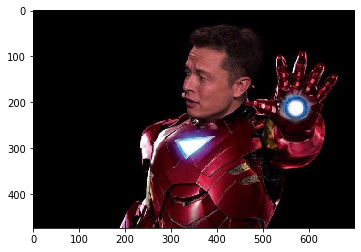

In [2]:
## Importing an Image
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

#reading the image 
 
imageRead = cv2.imread('elonIronMan.jpg') #default colorspace ? 
image = cv2.cvtColor(imageRead,cv2.COLOR_BGR2RGB)

#plotting the image

#plt.imshow(imageRead)
plt.imshow(image)

#saving image
#cv2.imwrite('test_write.jpg',image)

'\n    cv2.IMREAD_COLOR: Default flag for loading a color image\n    cv2.IMREAD_GRAYSCALE: Loads images in grayscale format\n    cv2.IMREAD_UNCHANGED: Loads images in their given format, including the alpha channel. Alpha channel stores the transparency information – the higher the value of alpha channel, the more opaque is the pixel\n\n'

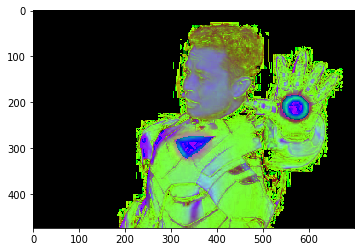

In [13]:
"""
A color space is a protocol for representing colors in a way that makes them easily reproducible. 
We know that grayscale images have single pixel values and color images contain 3 values for each pixel – the intensities 
of the Red, Green and Blue channels.
1. BGR
2. HSV
3. Grayscale
"""

## Changing color spaces
# converting image to Gray scale 
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#plotting the grayscale image
plt.imshow(gray_image) 
#converting image to HSV format
hsv_image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
#plotting the HSV image
plt.imshow(hsv_image)

"""
    cv2.IMREAD_COLOR: Default flag for loading a color image
    cv2.IMREAD_GRAYSCALE: Loads images in grayscale format
    cv2.IMREAD_UNCHANGED: Loads images in their given format, including the alpha channel. Alpha channel stores the transparency information – the higher the value of alpha channel, the more opaque is the pixel

"""

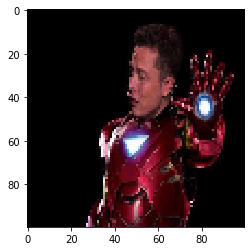

In [14]:
### Resizing image

"""
Different interpolation and downsampling methods are supported by OpenCV, which can be used by the following parameters:

    1. INTER_NEAREST: Nearest neighbor interpolation
    2. INTER_LINEAR: Bilinear interpolation
    3. INTER_AREA: Resampling using pixel area relation
    4. INTER_CUBIC: Bicubic interpolation over 4×4 pixel neighborhood
    
cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]])
"""

#converting image to size (100,100,3) 
smaller_image = cv2.resize(image,(100,100),cv2.INTER_LINEAR) 
#plot the resized image
plt.imshow(smaller_image)

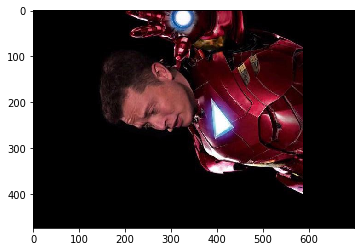

In [15]:
### Image Rotation
rows,cols = image.shape[:2] 
#(col/2,rows/2) is the center of rotation for the image 
# M is the cordinates of the center 
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1) 
dst = cv2.warpAffine(image,M,(cols,rows)) 
plt.imshow(dst)

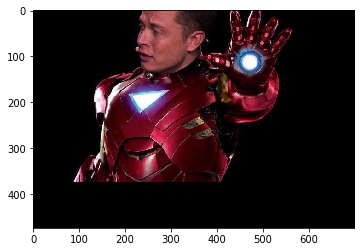

In [16]:
### Image Translation
#importing the required libraries 

#shifting the image 100 pixels in both dimensions
M = np.float32([[1,0,-100],[0,1,-100]]) 
dst = cv2.warpAffine(image,M,(cols,rows)) 
plt.imshow(dst)

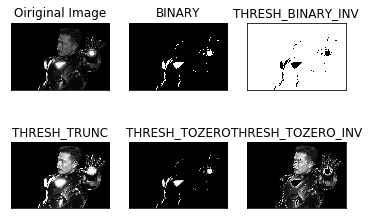

In [17]:
### Simple Image Thresholding
"""
if Image(x,y) > threshold 
    Image(x,y) = 1
else 
    Image(x,y) = 0
"""

#here 0 means that the image is loaded in gray scale format
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

ret,thresh_binary = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
ret,thresh_binary_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY_INV)
ret,thresh_trunc = cv2.threshold(gray_image,127,255,cv2.THRESH_TRUNC)
ret,thresh_tozero = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO)
ret,thresh_tozero_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO_INV)

#DISPLAYING THE DIFFERENT THRESHOLDING STYLES
names = ['Oiriginal Image','BINARY','THRESH_BINARY_INV','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']
images = gray_image,thresh_binary,thresh_binary_inv,thresh_trunc,thresh_tozero,thresh_tozero_inv

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

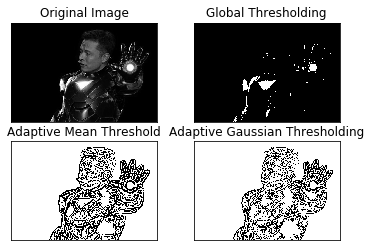

In [18]:
### Adaptive Thresholding
"""
In case of adaptive thresholding, different threshold values are used for different parts of the image. 
This function gives better results for images with varying lighting conditions – hence the term “adaptive”.

Otsu’s binarization method finds an optimal threshold value for the whole image. 
It works well for bimodal images (images with 2 peaks in their histogram).
"""

ret,thresh_global = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
#here 11 is the pixel neighbourhood that is used to calculate the threshold value
thresh_mean = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

thresh_gaussian = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

names = ['Original Image','Global Thresholding','Adaptive Mean Threshold','Adaptive Gaussian Thresholding']
images = [gray_image,thresh_global,thresh_mean,thresh_gaussian]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

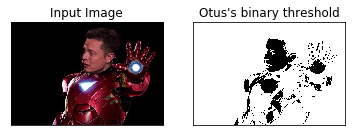

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('elonIronMan.jpg')
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.subplot(121),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(thresh, 'gray')
plt.title("Otus's binary threshold"), plt.xticks([]), plt.yticks([])
plt.show()

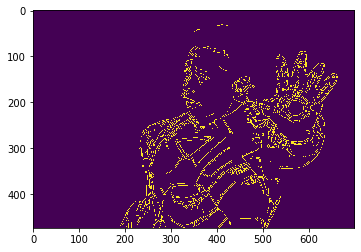

In [20]:
### Edge Detection
"""
Edges are the points in an image where the image brightness changes sharply or has discontinuities. 
Such discontinuities generally correspond to:

    Discontinuities in depth
    Discontinuities in surface orientation
    Changes in material properties
    Variations in scene illumination
"""
image = cv2.imread('elonIronMan.jpg') 
# plt.imshow(imageRead)
#calculate the edges using Canny edge algorithm
edges = cv2.Canny(image,100,200) 
#plot the edges
plt.imshow(edges)

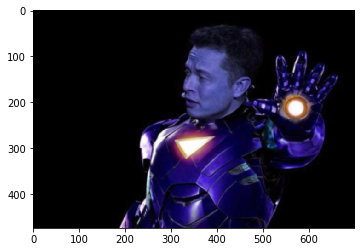

In [8]:
"""
### Image Filtering

In image filtering, a pixel value is updated using its neighbouring values. 
But how are these values updated in the first place?
Well, there are multiple ways of updating pixel values, such as selecting the maximum value from neighbours, 
using the average of neighbours, etc. Each method has it’s own uses. For example, averaging the pixel values 
in a neighbourhood is used for image blurring.

For image filtering, we use kernels. Kernels are matrices of numbers of different shapes like 3 x 3, 5 x 5, etc. 
A kernel is used to calculate the dot product with a part of the image. When calculating the new value of a pixel, 
the kernel center is overlapped with the pixel. The neighbouring pixel values are multiplied with the corresponding 
values in the kernel. The calculated value is assigned to the pixel coinciding with the center of the kernel.
"""
### Gaussian Blurring : Important in the feature extraction process because it reduces the noise present in the image.
#using the averaging kernel for image smoothening 
imageGray = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
averaging_kernel = np.ones((3,3),np.float32)/9 
filtered_image = cv2.filter2D(imageGray,-1, averaging_kernel) 
# plt.imshow(filtered_image) 
#get a one dimensional Gaussian Kernel 
gaussian_kernel_x = cv2.getGaussianKernel(5,1) 
gaussian_kernel_y = cv2.getGaussianKernel(5,1) 
#converting to two dimensional kernel using matrix multiplication 
gaussian_kernel = gaussian_kernel_x * gaussian_kernel_y.T 
#you can also use cv2.GaussianBLurring(image,(shape of kernel),standard deviation) instead of cv2.filter2D 
filtered_image = cv2.filter2D(imageGray,-1,gaussian_kernel) 
plt.imshow(filtered_image)

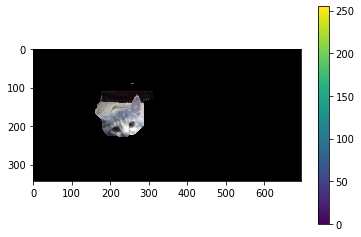

In [22]:
# webcam image
# foreground extraction

import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('CatShot.png')
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (161,79,150,150)

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img)
plt.colorbar()
plt.show()

### Keypoint Detection and Feature Matching

1. Scale Invariant Feature Transform (SIFT)

Keypoints is a concept you should be aware of when working with images. These are basically the points of interest in an image. Keypoints are analogous to the features of a given image.

They are locations that define what is interesting in the image. Keypoints are important, because no matter how the image is modified (rotation, shrinking, expanding, distortion), we will always find the same keypoints for the image.


2. Speeded-Up Robust Features (SURF) is an enhanced version of SIFT. It works much faster and is more robust to image transformations. 


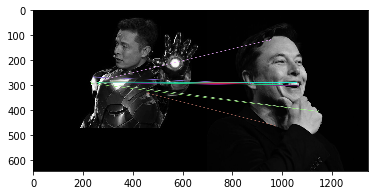

(<matplotlib.image.AxesImage at 0x7f0f4c04a390>, None)

In [3]:
#two random image similar to each other

img1 = cv2.imread('elonIronMan.jpg',cv2.IMREAD_GRAYSCALE)          # queryImage
img2 = cv2.imread('elonlauh.jpg',cv2.IMREAD_GRAYSCALE) # trainImage

# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

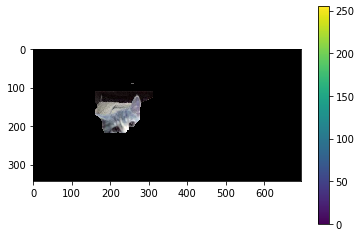

In [24]:
# webcam image
# foreground extraction

import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('CatShot.png')
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (161,79,150,150)

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img)
plt.colorbar()
plt.show()

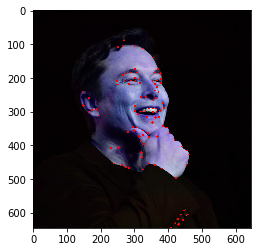

In [25]:
#paint image

import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('elonlauh.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10)
corners = np.int0(corners)

for corner in corners:
    x,y = corner.ravel()
    cv2.circle(img,(x,y),3,255,-1)
    
plt.imshow(img)